In [1]:
using BoundaryValueDiffEq
using Plots 

In [2]:
# solves the scalar diffusion equatiobn -d^4/dx^4 u(x) = f(x)
# on the interval 0 < x < 80
# supplied with Dirichlet or Neumann boundary conditions 

In [3]:
# define spatial range 
xspan = (0.0, 80.)

(0.0, 80.0)

In [4]:
# define the source function f(x)
function sourceFct(x)
    X0 = 60
    σ = 0.8
    A = 10.
    return  A .* exp.(.-((x .- X0).^2)./σ^2)
    #return 0 .* x + 10
end

sourceFct (generic function with 1 method)

In [6]:
# define diffusion equation 
function diffusion!(du, u, p, x)
    # u[1]: concentration 
    # u[2]: fluc 
    # d/dx(concentration)  = flux 
    du[1] = u[2]
    # d/dx(flux)  = sourceFct
    du[2] = u[3]
    du[3] = u[4]
    du[4] = 0 + sourceFct(x)
end

diffusion! (generic function with 1 method)

In [7]:
# define boundary conditions 
function boundaries!(residual, u, p, x)
    # residual boundary condition in the left end-point 
    residual[1] = u[1][1] - 0.
    residual[2] = u[2][1] - 0.
    residual[end-1] = u[end-1][1] - 0.
    residual[end] = u[end][1] - 0
end

boundaries! (generic function with 1 method)

In [8]:
# Parameter for a copper bar 
d= 8.92 #density 
sh= 0.092 #specific_heat
tc= 0.95 #thermal_conductivity
N =100
l = 80.
dx = l/N
xvec = Vector(0:dx:l)

c = ( tc / (sh * d))^(1/2) 
p = [c^2]; 

In [9]:
#set the boundary value problem to solve
bvp1 = BVProblem(diffusion!, boundaries!, [0., 0.,0.,0.], xspan,p)

# set the boundary value problem  
sol1 = solve(bvp1, GeneralMIRK4(), dt = 1)

retcode: Success
Interpolation: 1st order linear
t: 81-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮
 69.0
 70.0
 71.0
 72.0
 73.0
 74.0
 75.0
 76.0
 77.0
 78.0
 79.0
 80.0
u: 81-element Array{Array{Float64,1},1}:
 [0.0, -25.85664706911763, 52.43458912323949, -2.1638849550126427]
 [0.0, 25.495999576615525, 50.27070416822684, -2.1638849550126427]
 [50.270704168226835, 74.68476126733604, 48.1068192132142, -2.1638849550126427]
 [148.64822754966787, 121.70963800304393, 45.94293425820156, -2.1638849550126427]
 [292.9686851893105, 166.57062978373918, 43.77904930318892, -2.1638849550126427]
 [481.06819213214203, 209.26773660942177, 41.61516434817627, -2.1638849550126427]
 [710.7828634231498, 249.8009584800917, 39.45127939316363, -2.1638849550126427]
 [979.9488141073213, 288.170295395749, 37.28739443815099, -2.1638849550126427]
 [1286.4021592296435, 324.3757473563937, 35.12350948313835, -2.1638849550126427]
 [1627.9790138351043, 358

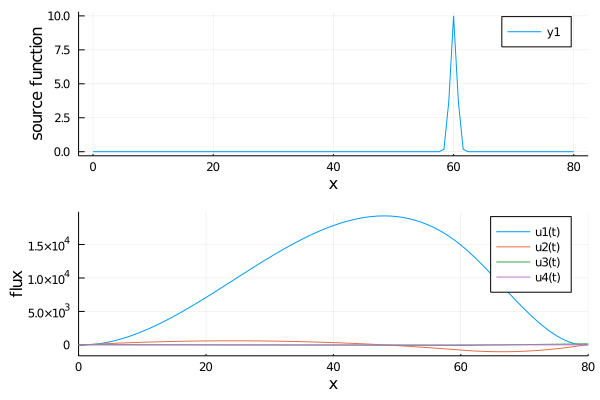

In [10]:
# plot the computed solution
xvec = Vector(0:dx:l)
fvec = sourceFct.(xvec)
p1 = plot(xvec,fvec)
xlabel!("x") 
ylabel!("source function")

p3 = plot(sol1, idxs = (2))
xlabel!("x") 
ylabel!("flux")

plot(p1,p3,layout=(2,1))